<a href="https://colab.research.google.com/github/Istiak-Ahmed78/Adaptive-Defense-Against-Packet-Mutation/blob/main/Try_in_change_attack_algorithm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing **Datasets**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# After mounting, access your file


Mounted at /content/drive


In [ ]:
import pandas as pd
df = pd.read_csv('/content/drive/MyDrive/Dataset/UNSW_NB15_training-set.csv')

# Cleaning the dataset

In [ ]:
import pandas as pd

def remove_non_numeric_features(df):
    # Select only columns with numeric data types
    numeric_df = df.select_dtypes(include=['number'])

    # Optional: Report which columns were removed
    removed_cols = set(df.columns) - set(numeric_df.columns)
    if removed_cols:
        print(f"Removed non-numeric columns: {', '.join(removed_cols)}")

    return numeric_df

In [ ]:
clean_df = remove_non_numeric_features(df)

Removed non-numeric columns: state, attack_cat, proto, service


In [ ]:
clean_df.head()

,id,dur,spkts,dpkts,sbytes,dbytes,rate,sttl,dttl,sload,...,ct_src_dport_ltm,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,label
0,1,0.121478,6,4,258,172,74.087490,252,254,14158.942380,...,1,1,1,0,0,0,1,1,0,0
1,2,0.649902,14,38,734,42014,78.473372,62,252,8395.112305,...,1,1,2,0,0,0,1,6,0,0
2,3,1.623129,8,16,364,13186,14.170161,62,252,1572.271851,...,1,1,3,0,0,0,2,6,0,0
3,4,1.681642,12,12,628,770,13.677108,62,252,2740.178955,...,1,1,3,1,1,0,2,1,0,0
4,5,0.449454,10,6,534,268,33.373826,254,252,8561.499023,...,2,1,40,0,0,0,2,39,0,0


In [ ]:
clean_df.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

# Applying Smot algorithm

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE

# Load a credit card fraud dataset (example)
# In this dataset, 'Class' is the target: 0 = normal transaction, 1 = fraudulent
df = clean_df.copy()


print(df.columns)

df.head()

df.head()

# Check class imbalance
print("Class distribution before SMOTE:")
print(df['label'].value_counts())
# Might show something like: 0: 284,315 (normal transactions), 1: 492 (fraudulent)

# Prepare features and target
X = df.drop('label', axis=1)
y = df['label']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train a model without SMOTE
model_no_smote = RandomForestClassifier(random_state=42)
model_no_smote.fit(X_train, y_train)
y_pred_no_smote = model_no_smote.predict(X_test)

print("Model performance WITHOUT SMOTE:")
print(classification_report(y_test, y_pred_no_smote))
# Likely shows high overall accuracy but poor recall on class 1 (frauds)

# Apply SMOTE to balance the training data
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check new class distribution
print("Class distribution after SMOTE:")
print(pd.Series(y_train_smote).value_counts())
# Should show balanced classes

# Train a new model with SMOTE-enhanced data
model_smote = RandomForestClassifier(random_state=42)
model_smote.fit(X_train_smote, y_train_smote)
y_pred_smote = model_smote.predict(X_test)

print("Model performance WITH SMOTE:")
print(classification_report(y_test, y_pred_smote))
# Should show improved recall for class 1 (frauds)

# Save the balanced data to a CSV file
# First, convert X_train_smote to DataFrame with original column names
balanced_df = pd.DataFrame(X_train_smote, columns=X.columns)

# Then add the target column
balanced_df['label'] = y_train_smote

# Save to CSV
output_file = 'balanced_data.csv'
balanced_df.to_csv(output_file, index=False)
print(f"\nBalanced data saved to '{output_file}'")

# Optionally, save the test data for later use
test_df = pd.DataFrame(X_test, columns=X.columns)
test_df['label'] = y_test
test_df.to_csv('test_data.csv', index=False)
print(f"Test data saved to 'test_data.csv'")

# Print examples of synthetic data
print("\nExamples of original minority class samples:")
original_minority = df[df['label'] == 1].head(2)
print(original_minority)

print("\nExamples of synthetic minority class samples after SMOTE:")
synthetic_minority = balanced_df[balanced_df['label'] == 1].iloc[-2:]
print(synthetic_minority)

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')
Class distribution before SMOTE:
label
1    119341
0     56000
Name: count, dtype: int64
Model performance WITHOUT SMOTE:
              precision    recall  f1-score   support

           0       0.99      0.97      0.98     16772
           1       0.98      1.00      0.99     35831

    accuracy                           0.99     52603
   macro avg       0.99      0.98      0.99     52603
weighted avg       0.99      0.99      0.99     52603

Class 

# Finding important features

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')
Dataset Shape: (167020, 41)

Feature names:
['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_

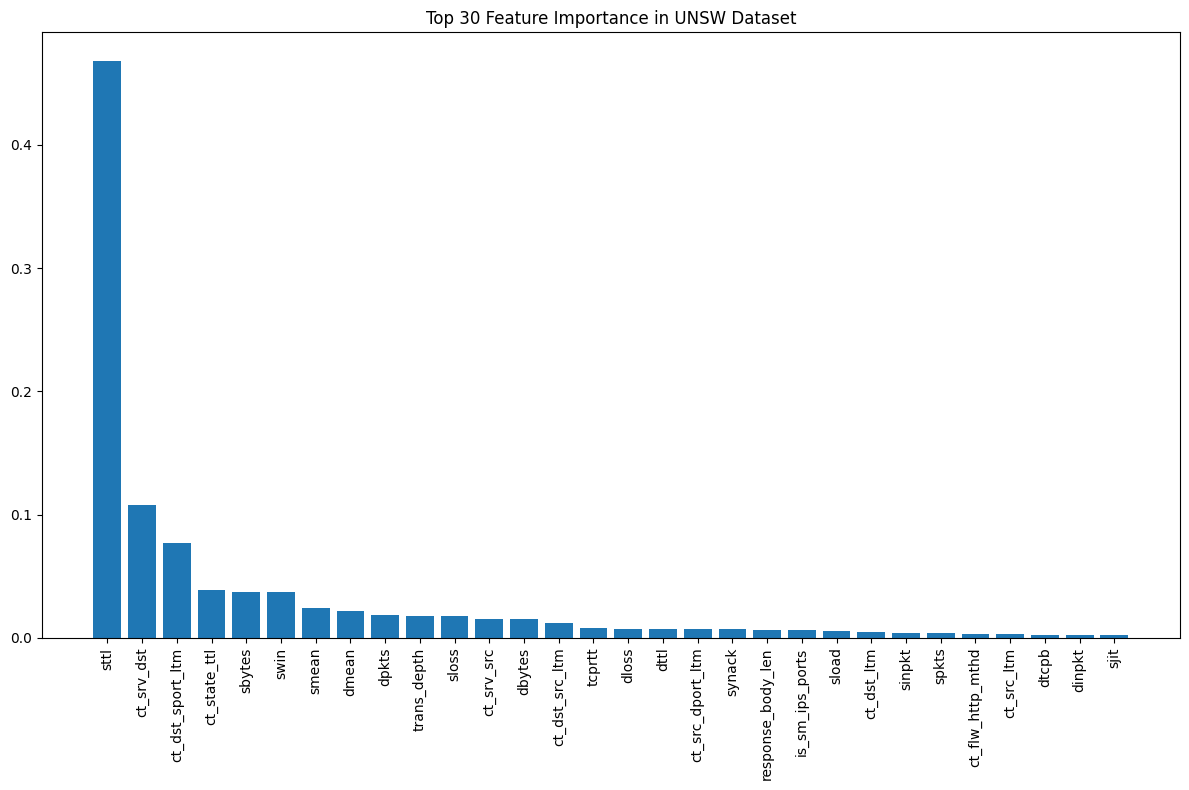


Full Model Performance:
Accuracy: 0.9550951981798587
              precision    recall  f1-score   support

           0       0.95      0.96      0.95     16623
           1       0.96      0.95      0.96     16781

    accuracy                           0.96     33404
   macro avg       0.96      0.96      0.96     33404
weighted avg       0.96      0.96      0.96     33404


Selected Features Model Performance:
Accuracy: 0.955813675008981
              precision    recall  f1-score   support

           0       0.95      0.96      0.96     16623
           1       0.96      0.95      0.96     16781

    accuracy                           0.96     33404
   macro avg       0.96      0.96      0.96     33404
weighted avg       0.96      0.96      0.96     33404


Selected features saved to 'selected_features_unsw.csv'


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Load the UNSW-NB15 dataset
# Adjust the file path as needed for your environment
df = pd.read_csv('/content/balanced_data.csv')
print(df.columns)

df.head()

# Display basic information
print("Dataset Shape:", df.shape)
print("\nFeature names:")
print(df.columns.tolist())

# Preprocess the data
# Assuming 'label' or 'attack_cat' is your target column
# For binary classification (normal vs. attack)
X = df.drop(['label', 'id'], axis=1, errors='ignore')  # Adjust column names as needed
y = df['label']  # Adjust target column name as needed

# Handle categorical features if present
X = pd.get_dummies(X)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost model
model = xgb.XGBClassifier(
    objective='binary:logistic' if len(np.unique(y)) == 2 else 'multi:softprob',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)

# Get feature importance
feature_importance = model.feature_importances_
features = X.columns

# Create DataFrame of features and their importance scores
feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': feature_importance
})

# Sort by importance
feature_importance_df = feature_importance_df.sort_values('Importance', ascending=False)

# Display top 20 features
print("\nTop 30 most important features:")
print(feature_importance_df.head(30))  # You can change importance feature number

# Plot feature importance
plt.figure(figsize=(12, 8))
plt.bar(feature_importance_df['Feature'].head(30), feature_importance_df['Importance'].head(30)) # You can change importance feature number
plt.xticks(rotation=90)
plt.title('Top 30 Feature Importance in UNSW Dataset')
plt.tight_layout()
plt.show()

# Select top N features (e.g., top 20)
top_features = feature_importance_df['Feature'].head(30).tolist() # You can change importance feature number
X_train_selected = X_train[top_features]
X_test_selected = X_test[top_features]

# Train a new model with selected features
model_selected = xgb.XGBClassifier(
    objective='binary:logistic' if len(np.unique(y)) == 2 else 'multi:softprob',
    n_estimators=100,
    learning_rate=0.1,
    random_state=42
)
model_selected.fit(X_train_selected, y_train)

# Evaluate full model
y_pred_full = model.predict(X_test)
print("\nFull Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_full))
print(classification_report(y_test, y_pred_full))

# Evaluate model with selected features
y_pred_selected = model_selected.predict(X_test_selected)
print("\nSelected Features Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_selected))
print(classification_report(y_test, y_pred_selected))

# Save selected features to CSV
selected_features_df = pd.DataFrame({'Selected_Features': top_features})
selected_features_df.to_csv('selected_features_unsw.csv', index=False)
print("\nSelected features saved to 'selected_features_unsw.csv'")



In [ ]:
df.columns

Index(['id', 'dur', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl',
       'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit',
       'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat',
       'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src',
       'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm',
       'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd',
       'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'label'],
      dtype='object')

## **Creating new dataset with important features only**

New dataset is also saved to the **files**

In [ ]:


# Load the original dataset (replace 'original_dataset.csv' with your actual file path)
original_df = df.copy()

# Load the selected features
selected_features_df = pd.read_csv('selected_features_unsw.csv')

# Get the list of selected features
selected_features = selected_features_df['Selected_Features'].tolist()

# Make sure the label column is included (replace 'label' with your actual label column name)
label_column = 'label'  # Change this to your actual label column name
selected_features.append(label_column)

# Verify which features exist in the original dataset
available_features = [feat for feat in selected_features if feat in original_df.columns]

# Create the new dataset with only the selected features and label
new_df = original_df[available_features]

# Save the new dataset
new_df.to_csv('new_dataset_with_selected_features.csv', index=False)

print(f"New dataset created with {len(available_features)-1} features and label")
print("Features used:", [f for f in available_features if f != label_column])

New dataset created with 30 features and label
Features used: ['sttl', 'ct_srv_dst', 'ct_dst_sport_ltm', 'ct_state_ttl', 'sbytes', 'swin', 'smean', 'dmean', 'dpkts', 'trans_depth', 'sloss', 'ct_srv_src', 'dbytes', 'ct_dst_src_ltm', 'tcprtt', 'dloss', 'dttl', 'ct_src_dport_ltm', 'synack', 'response_body_len', 'is_sm_ips_ports', 'sload', 'ct_dst_ltm', 'sinpkt', 'spkts', 'ct_flw_http_mthd', 'ct_src_ltm', 'dtcpb', 'dinpkt', 'sjit']


In [ ]:
print(new_df[new_df.label==0].shape)
print(new_df[new_df.label==1].shape)

(83510, 31)
(83510, 31)


# Let's start working with the attack algorithm

**Laod the dataset**

In [ ]:
import pandas as pd
import numpy as np
import random
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, accuracy_score
import matplotlib.pyplot as plt

# Load the attack dataset
# Assuming the dataset with selected features and label is available
# If using the output of 'new_dataset_with_selected_features.csv', adjust the path
try:
    # Try loading from the generated file first
    new_df = pd.read_csv('new_dataset_with_selected_features.csv')
    print(f"Loaded {len(new_df)} samples from 'new_dataset_with_selected_features.csv'")
except FileNotFoundError:
    # Fallback to balanced_data.csv if the specific file with selected features is not found
    print("Warning: 'new_dataset_with_selected_features.csv' not found. Loading 'balanced_data.csv' instead.")
    new_df = pd.read_csv('balanced_data.csv')
    # Ensure 'id' is dropped if present in balanced_data.csv as it was dropped in feature selection
    if 'id' in new_df.columns:
        new_df = new_df.drop('id', axis=1)
    print(f"Loaded {len(new_df)} samples from 'balanced_data.csv'")



Loaded 167020 samples from 'new_dataset_with_selected_features.csv'


In [ ]:
# Ensure 'label' column exists
if 'label' not in new_df.columns:
    print("Error: 'label' column not found in the dataset.")
else:
    print(f"Loaded dataset with {new_df.shape[1]} features (including label)")

    # Split data for training a detector model and generating adversarial examples
    X = new_df.drop('label', axis=1)
    y = new_df['label']  # Assuming label=1 for attack samples used in ALMA

    # Split into train (to build NIDS model) and holdout (to generate adversarial samples)
    # Ensure stratification if possible, but with potentially only attack samples, it might not apply
    # Let's assume for ALMA we are focusing on generating adversarial examples for the attack class (label=1)
    # So, we filter for attack samples if the dataset contains both classes
    attack_samples_for_alma = new_df[new_df['label'] == 1].drop('label', axis=1)


    # Use a subset of attack samples for holdout to make ALMA faster for demonstration
    # You might want to adjust this number based on your dataset size and computational resources
    holdout_sample_size = min(500, len(attack_samples_for_alma)) # Use at most 500 for holdout
    if holdout_sample_size == 0:
        print("Error: No attack samples (label=1) found to generate adversarial examples.")
    else:
        X_holdout = attack_samples_for_alma.sample(n=holdout_sample_size, random_state=42)
        y_holdout = pd.Series([1] * len(X_holdout), index=X_holdout.index) # Explicitly set labels to 1
        print(f"Using {X_holdout.shape} attack samples X for ALMA holdout set.")
        print(f"Using {y_holdout.shape} attack samples y for ALMA holdout set.")



        # We need some benign samples to train a detector
        # For this example, we'll use the original normal samples from balanced_data.csv
        # or generate synthetic ones if balanced_data.csv is not available or doesn't have normal samples.

        try:
            balanced_df_full = pd.read_csv('balanced_data.csv')
            normal_samples_original = balanced_df_full[balanced_df_full['label'] == 0].drop('label', axis=1)
            # Select the same features as used in the ALMA process
            normal_samples_for_nids = normal_samples_original[X.columns]

            # Use a subset of normal samples for training the NIDS
            nids_normal_sample_size = min(5000, len(normal_samples_for_nids))
            if nids_normal_sample_size > 0:
                X_normal_for_nids = normal_samples_for_nids.sample(n=nids_normal_sample_size, random_state=42)
                y_normal_for_nids = pd.Series([0] * len(X_normal_for_nids), index=X_normal_for_nids.index)
            else:
                 print("Warning: No normal samples (label=0) found in balanced_data.csv or after feature selection. Generating synthetic normal samples.")
                 # Fallback to synthetic generation if no normal samples
                 def generate_synthetic_normal_samples(attack_samples, n_samples=5000):
                    """Generate synthetic normal samples by perturbing feature distributions"""
                    synthetic_normal = attack_samples.sample(n_samples, replace=True).copy()
                    for col in synthetic_normal.columns:
                        if synthetic_normal[col].dtype in [np.float64, np.float32]:
                            synthetic_normal[col] = synthetic_normal[col] * np.random.uniform(0.1, 0.5, size=len(synthetic_normal))
                        else:
                            synthetic_normal[col] = (synthetic_normal[col] * np.random.uniform(0.1, 0.4, size=len(synthetic_normal))).astype(int)
                    return synthetic_normal
                 X_normal_for_nids = generate_synthetic_normal_samples(X.copy(), n_samples=5000)
                 y_normal_for_nids = pd.Series([0] * len(X_normal_for_nids), index=X_normal_for_nids.index)


        except FileNotFoundError:
            print("Warning: 'balanced_data.csv' not found. Generating synthetic normal samples for NIDS training.")
            # Generate synthetic normal data for detector training if balanced_data.csv is not available
            def generate_synthetic_normal_samples(attack_samples, n_samples=5000):
                """Generate synthetic normal samples by perturbing feature distributions"""
                synthetic_normal = attack_samples.sample(n_samples, replace=True).copy()
                for col in synthetic_normal.columns:
                    if synthetic_normal[col].dtype in [np.float64, np.float32]:
                        synthetic_normal[col] = synthetic_normal[col] * np.random.uniform(0.1, 0.5, size=len(synthetic_normal))
                    else:
                        synthetic_normal[col] = (synthetic_normal[col] * np.random.uniform(0.1, 0.4, size=len(synthetic_normal))).astype(int)
                return synthetic_normal

            X_normal_for_nids = generate_synthetic_normal_samples(X.copy(), n_samples=5000)
            y_normal_for_nids = pd.Series([0] * len(X_normal_for_nids), index=X_normal_for_nids.index)

Loaded dataset with 31 features (including label)
Using (500, 30) attack samples X for ALMA holdout set.
Using (500,) attack samples y for ALMA holdout set.


In [ ]:
# Combine with attack data to create a balanced training set for the NIDS model
# Use a subset of attack samples for NIDS training as well
nids_attack_sample_size = min(len(X_normal_for_nids), len(attack_samples_for_alma) - holdout_sample_size)
if nids_attack_sample_size > 0:
     X_attack_for_nids = attack_samples_for_alma.drop(index=X_holdout.index).sample(n=nids_attack_sample_size, random_state=42)
     y_attack_for_nids = pd.Series([1] * len(X_attack_for_nids), index=X_attack_for_nids.index)

     X_train_combined = pd.concat([X_normal_for_nids, X_attack_for_nids])
     y_train_combined = pd.concat([y_normal_for_nids, y_attack_for_nids])
else:
     print("Error: Not enough attack samples to train NIDS model after selecting holdout set.")


# Scale features for better model performance
scaler = StandardScaler()
X_train_combined_scaled = scaler.fit_transform(X_train_combined)
X_holdout_scaled = scaler.transform(X_holdout)

# Train a NIDS model (this will be the target to evade)
print("Training NIDS model...")
nids_model = RandomForestClassifier(n_estimators=100, random_state=42)
nids_model.fit(X_train_combined_scaled, y_train_combined)

# Check initial detection rate on holdout set
initial_predictions = nids_model.predict(X_holdout_scaled)
initial_detection_rate = np.mean(initial_predictions)
print(f"Initial detection rate on holdout attack samples: {initial_detection_rate:.4f}")

# Feature categorization - this helps to guide mutations more effectively
feature_categories = {
    'packet_headers': ['sttl', 'dttl', 'swin', 'dtcpb'],
    'traffic_volume': ['sbytes', 'dbytes', 'spkts', 'dpkts', 'sloss', 'dloss'],
    'connection_stats': ['ct_srv_dst', 'ct_dst_sport_ltm', 'ct_state_ttl', 'ct_srv_src',
                         'ct_dst_src_ltm', 'ct_src_dport_ltm', 'ct_dst_ltm', 'ct_src_ltm'],
    'timing': ['tcprtt', 'synack', 'sinpkt', 'sjit', 'rate'],
    'application': ['is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'response_body_len', 'trans_depth'],
    'statistical': ['smean', 'dmean', 'sload']
}

# Flatten the dictionary to get feature->category mapping
feature_to_category = {}
for category, features in feature_categories.items():
    for feature in features:
        feature_to_category[feature] = category

# Get feature importances from the model
# Use the columns from X (after potential feature selection) for feature importances
feature_importances = pd.DataFrame({
    'feature': X_train_combined.columns, # Use columns from NIDS training data
    'importance': nids_model.feature_importances_
}).sort_values('importance', ascending=False)

print("\nTop 10 most important features for detection:")
print(feature_importances.head(10))

Training NIDS model...
Initial detection rate on holdout attack samples: 0.9560

Top 10 most important features for detection:
         feature  importance
0           sttl    0.196136
3   ct_state_ttl    0.112463
16          dttl    0.081047
21         sload    0.073990
28        dinpkt    0.041794
8          dpkts    0.041682
1     ct_srv_dst    0.041259
4         sbytes    0.041145
6          smean    0.035802
7          dmean    0.034282


# Let's talk about new algorithm

Load and import necessary libraries

In [ ]:
import random
import numpy as np
import copy
from sklearn.ensemble import RandomForestClassifier

from sklearn.model_selection import train_test_split

# === Realistic Training Dataset (placeholder for UNSW-NB15 or your real packet dataset) ===
input_x = X_attack_for_nids
output_y = y_attack_for_nids
print(f'Shape of input X dataset: {input_x.shape}')
print(f'Shape of outpuy Y dataset: {output_y.shape}')
X_train_2nd_algorithm_scaled = scaler.fit_transform(input_x)
X_train, X_test, y_train, y_test = train_test_split(X_train_2nd_algorithm_scaled, output_y, test_size=0.3, random_state=42)
print(f'Shape of the training X dataset: {X_train.shape}')
print(f'Shape of the testing X dataset: {X_test.shape}')

Shape of input X dataset: (5000, 30)
Shape of outpuy Y dataset: (5000,)
Shape of the training X dataset: (3500, 30)
Shape of the testing X dataset: (1500, 30)


In [ ]:
len(y_test[y_test == 1])

1500

In [ ]:
# === NIDS Model: Random Forest ===
nids_model = RandomForestClassifier(n_estimators=100, random_state=42)
nids_model.fit(X_train_combined_scaled, y_train_combined)

# === Mutation Function ===
def mutate_packet(packet, mutation_rate=0.1):
    mutated = packet.copy()
    mutation = np.random.normal(0, mutation_rate, size=packet.shape)
    return np.clip(mutated + mutation, 0, 1)  # ensure values remain within [0,1]

# === Fitness Function ===
def fitness_function(packet, nids_model, alpha):
    proba = nids_model.predict_proba([packet])[0][1]  # probability of being attack
    detection_prob = proba  # higher means detected more
    evasion_score = 1 - detection_prob
    efficacy = 1.0  # assume all packets retain efficacy (can be adjusted)
    fitness = alpha * evasion_score + (1 - alpha) * efficacy
    return fitness, detection_prob, efficacy

# === Genetic Algorithm ===
def packet_mutation_attack(original_packet, nids_model, alpha=0.6, N=30, M=10):
    population = [original_packet] + [mutate_packet(original_packet) for _ in range(M - 1)]

    for gen in range(1, N + 1):
        print(f"\n=== Generation {gen} ===")
        fitness_data = []
        for i, pkt in enumerate(population):
            fit, det_prob, eff = fitness_function(pkt, nids_model, alpha)
            fitness_data.append((pkt, fit))
            print(f"Packet {i:02d} | Detection Prob: {det_prob:.3f} | Efficacy: {eff:.3f} | Fitness: {fit:.4f}")

        avg_fit = np.mean([fd[1] for fd in fitness_data])
        best_pkt, best_fit = max(fitness_data, key=lambda x: x[1])
        _, best_det_prob, _ = fitness_function(best_pkt, nids_model, alpha)

        print(f">>> Best Packet Fitness: {best_fit:.4f}, Detection Prob: {best_det_prob:.4f}")

        if best_det_prob < 0.01:
            print(">>> EARLY TERMINATION: Packet evaded NIDS")
            return best_pkt

        # Select top 50%
        sorted_pop = sorted(fitness_data, key=lambda x: x[1], reverse=True)
        selected = [p for p, _ in sorted_pop[:M // 2]]

        # Generate next generation
        new_population = selected[:]
        while len(new_population) < M:
            p1, p2 = random.sample(selected, 2)
            child = (p1 + p2) / 2  # crossover
            child = mutate_packet(child)
            new_population.append(child)

        population = new_population
        print(f"Average Fitness This Generation: {avg_fit:.4f}")

    print(">>> TERMINATED AFTER MAX GENERATIONS")
    return best_pkt

# === Run Example Attack ===
if __name__ == "__main__":
    # Select a malicious packet to mutate
    malicious_indices = np.where(y_test == 1)[0]
    original_packet = X_test[malicious_indices[0]]

    adv_packet = packet_mutation_attack(original_packet, nids_model, alpha=0.6, N=30, M=10)

    print("\n=== FINAL ADVERSARIAL PACKET ===")
    print(adv_packet)

    # Convert adv_packet to DataFrame and save to CSV
    # Assuming X_test has the correct column names
    adv_packet_df = pd.DataFrame([adv_packet], columns=X.columns)
    adv_packet_df.to_csv('adversarial_packet.csv', index=False)
    print("\nAdversarial packet saved to 'adversarial_packet.csv'")


=== Generation 1 ===
Packet 00 | Detection Prob: 0.650 | Efficacy: 1.000 | Fitness: 0.6100
Packet 01 | Detection Prob: 0.290 | Efficacy: 1.000 | Fitness: 0.8260
Packet 02 | Detection Prob: 0.290 | Efficacy: 1.000 | Fitness: 0.8260
Packet 03 | Detection Prob: 0.290 | Efficacy: 1.000 | Fitness: 0.8260
Packet 04 | Detection Prob: 0.290 | Efficacy: 1.000 | Fitness: 0.8260
Packet 05 | Detection Prob: 0.290 | Efficacy: 1.000 | Fitness: 0.8260
Packet 06 | Detection Prob: 0.290 | Efficacy: 1.000 | Fitness: 0.8260
Packet 07 | Detection Prob: 0.300 | Efficacy: 1.000 | Fitness: 0.8200
Packet 08 | Detection Prob: 0.280 | Efficacy: 1.000 | Fitness: 0.8320
Packet 09 | Detection Prob: 0.290 | Efficacy: 1.000 | Fitness: 0.8260
>>> Best Packet Fitness: 0.8320, Detection Prob: 0.2800
Average Fitness This Generation: 0.8044

=== Generation 2 ===
Packet 00 | Detection Prob: 0.280 | Efficacy: 1.000 | Fitness: 0.8320
Packet 01 | Detection Prob: 0.290 | Efficacy: 1.000 | Fitness: 0.8260
Packet 02 | Detectio

# Defense Algorithm

In [ ]:
class AdaptiveDefenseSystem:
    def __init__(self, base_models, meta_model, threshold=0.8, update_frequency=1000):
        self.base_models = base_models       # list of ML models (e.g., [RF, SVM, CNN, LSTM])
        self.meta_model = meta_model         # meta-learner model
        self.threshold = threshold           # detection threshold τ
        self.buffer = []                     # buffer B to hold (packet, true_label)
        self.update_frequency = update_frequency
        self.false_positives = 0
        self.false_negatives = 0
        self.total_checked = 0

    def predict_ensemble(self, packet_features):
        base_predictions = [model.predict(packet_features) for model in self.base_models]
        return self.meta_model.predict(base_predictions)

    def update_models(self):
        X, y = zip(*self.buffer)
        for model in self.base_models:
            model.partial_fit(X, y)  # Assumes incremental learning support
        self.meta_model.partial_fit([ [m.predict(x) for m in self.base_models] for x in X ], y)
        self.buffer.clear()

    def adjust_threshold(self):
        if self.total_checked == 0:
            return

        fpr = self.false_positives / self.total_checked
        fnr = self.false_negatives / self.total_checked

        if fpr > 0.05:   # too many false positives → raise threshold
            self.threshold = min(self.threshold + 0.02, 0.99)
        elif fnr > 0.05: # too many false negatives → lower threshold
            self.threshold = max(self.threshold - 0.02, 0.5)

        # Reset counters
        self.false_positives = 0
        self.false_negatives = 0
        self.total_checked = 0

    def process_packet(self, packet_features, true_label):
        score = self.predict_ensemble(packet_features)
        predicted_label = 1 if score >= self.threshold else 0

        # Compare prediction with ground truth
        if predicted_label != true_label:
            if predicted_label == 1:
                self.false_positives += 1
            else:
                self.false_negatives += 1

        self.total_checked += 1

        if predicted_label == 1:
            self.trigger_alert(packet_features)

        self.buffer.append((packet_features, true_label))

        if len(self.buffer) >= self.update_frequency:
            self.update_models()
            self.adjust_threshold()

    def trigger_alert(self, packet):
        print("🚨 Potential Adversarial Packet Detected:", packet)


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier # Import SGDClassifier
import numpy as np # Import numpy
import pandas as pd # Import pandas
import tensorflow as tf # Import TensorFlow
from tensorflow.keras.models import Sequential # Import Sequential model
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Input, Reshape, LSTM # Import layers, Reshape, and LSTM
from tensorflow.keras.optimizers import Adam # Import optimizer


# Define a simple CNN model for tabular data
def build_cnn_model(input_shape):
    # Input shape should be (number_of_features, 1) for Conv1D with a single channel
    model = Sequential([
        Input(shape=input_shape), # Input shape is (number_of_features,)
        Reshape((input_shape[0], 1)), # Reshape to (number_of_features, 1) to add channel dimension
        Conv1D(filters=32, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(50, activation='relu'),
        Dense(1, activation='sigmoid') # Output layer for binary classification
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model

# Define a simple LSTM model for tabular data
def build_lstm_model(input_shape):
    # Input shape for LSTM is typically (batch_size, timesteps, feature_dim)
    # For tabular data, timesteps is the number of features, and feature_dim is 1
    model = Sequential([
        Input(shape=input_shape), # Input shape is (number_of_features,)
        Reshape((input_shape[0], 1)), # Reshape to (number_of_features, 1) for LSTM
        LSTM(50, activation='relu'),
        Dense(1, activation='sigmoid') # Output layer for binary classification
    ])
    model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])
    return model


# Placeholder DummyModel (No longer needed for CNN/LSTM but kept as a general placeholder if needed)
class DummyModel:
    def predict(self, X):
        # Return dummy predictions (e.g., all zeros or random)
        return np.zeros(len(X)) # Or np.random.rand(len(X)) for probabilities

    def partial_fit(self, X, y):
        # Dummy partial fit - does nothing
        pass


class AdaptiveDefenseSystem:
    def __init__(self, base_models, meta_model, threshold=0.8, update_frequency=1000):
        self.base_models = base_models       # list of ML models (e.g., [RF, SVM, CNN, LSTM])
        self.meta_model = meta_model         # meta-learner model
        self.threshold = threshold           # detection threshold τ
        self.buffer = []                     # buffer B to hold (packet, true_label)
        self.update_frequency = update_frequency
        self.false_positives = 0
        self.false_negatives = 0
        self.total_checked = 0

    def predict_ensemble(self, packet_features):
        # Ensure packet_features is a NumPy array for Keras model predictions
        packet_features_array = np.array(packet_features)

        base_predictions = []
        for model in self.base_models:
            if isinstance(model, tf.keras.Model):
                # Keras models (CNN/LSTM) expect input shape (n_samples, n_features, 1) after reshape
                # Reshape packet_features_array to add the channel dimension if needed
                if packet_features_array.ndim == 2:
                    keras_input = np.expand_dims(packet_features_array, axis=-1) # Add channel dimension
                elif packet_features_array.ndim == 3 and packet_features_array.shape[-1] == 1:
                    keras_input = packet_features_array # Already in correct shape
                else:
                     # Handle other potential shapes or raise error
                     print(f"Warning: Unexpected input shape for Keras model: {packet_features_array.shape}")
                     continue # Skip this model or handle appropriately

                keras_pred_proba = model.predict(keras_input)
                # For binary classification with sigmoid, predict_proba gives probabilities
                # We need to decide if the meta-model uses raw probabilities or class predictions (0 or 1)
                # Let's use class predictions (0 or 1) for simplicity for the meta-model
                keras_pred_class = (keras_pred_proba > 0.5).astype(int)
                base_predictions.append(keras_pred_class.flatten()) # Flatten to 1D array
            else:
                 # Scikit-learn models predict returns 0 or 1
                 skl_pred = model.predict(packet_features_array)
                 base_predictions.append(skl_pred)


        # Ensure base_predictions is in a format the meta_model can handle, e.g., a NumPy array
        # Each element in base_predictions is now a 1D array of predictions for the samples
        # Stack them column-wise and then transpose to get (n_samples, n_base_models)
        # Handle case where base_predictions is empty
        if not base_predictions:
             return np.array([]) # Return empty array if no base models could predict

        base_predictions_array = np.vstack(base_predictions).T # Transpose to have samples as rows
        return self.meta_model.predict(base_predictions_array)


    def update_models(self):
        if not self.buffer:
            return # Nothing to update if buffer is empty

        X_buffer, y_buffer = zip(*self.buffer)
        X_buffer_array = np.array(X_buffer) # Convert list of arrays/lists to a single NumPy array
        y_buffer_array = np.array(y_buffer) # Convert list to NumPy array


        for model in self.base_models:
             if isinstance(model, tf.keras.Model):
                 # Keras models do not have partial_fit.
                 # For incremental learning, you would typically retrain the model
                 # on the combined data (previous + buffer) or implement a custom training loop.
                 # This is a placeholder.
                 print(f"Note: Keras model ({type(model).__name__}) does not support partial_fit directly.")
                 # Example of retraining (might be slow for large buffers):
                 # Reshape X_buffer_array for Keras model input
                 if X_buffer_array.ndim == 2:
                     keras_train_input = np.expand_dims(X_buffer_array, axis=-1) # Add channel dimension
                 elif X_buffer_array.ndim == 3 and X_buffer_array.shape[-1] == 1:
                     keras_train_input = X_buffer_array # Already in correct shape
                 else:
                      print(f"Warning: Unexpected buffer shape for Keras model training: {X_buffer_array.shape}")
                      continue # Skip training this model

                 try:
                     # Train for one epoch on buffer data
                     model.fit(keras_train_input, y_buffer_array, epochs=1, verbose=0)
                 except Exception as e:
                      print(f"Error during Keras model training on buffer: {e}")


             else:
                 # Ensure X_buffer_array has the correct shape for partial_fit
                 # scikit-learn's partial_fit expects X as (n_samples, n_features)
                 # And y as (n_samples,)
                 try:
                    model.partial_fit(X_buffer_array, y_buffer_array, classes=np.unique(y_buffer_array)) # Pass unique classes
                 except Exception as e:
                     print(f"Error during partial_fit for base model {type(model).__name__}: {e}")
                     # Depending on the model, you might need to handle this differently
                     pass # Continue with other models if one fails


        # Prepare data for meta-model partial_fit
        meta_X = []
        for x in X_buffer_array:
            # Ensure each sample is passed in a format the base models expect (e.g., [x])
            base_preds_for_meta = []
            for model in self.base_models:
                 if isinstance(model, tf.keras.Model):
                     # Keras model prediction for a single sample
                     # Reshape single sample for Keras model input
                     single_keras_input = np.expand_dims(np.array([x]), axis=-1) # Shape (1, n_features, 1)
                     keras_pred_proba = model.predict(single_keras_input, verbose=0) # Use verbose=0 to suppress progress bar
                     keras_pred_class = (keras_pred_proba > 0.5).astype(int)[0][0] # Get the single prediction
                     base_preds_for_meta.append(keras_pred_class)
                 else:
                     # Scikit-learn model prediction for a single sample
                     skl_pred = model.predict(np.array([x]))[0] # Get the single prediction
                     base_preds_for_meta.append(skl_pred)

            meta_X.append(base_preds_for_meta)


        meta_X_array = np.array(meta_X)

        try:
            self.meta_model.partial_fit(meta_X_array, y_buffer_array, classes=np.unique(y_buffer_array)) # Pass unique classes
        except Exception as e:
             print(f"Error during partial_fit for meta model: {e}")
             pass # Continue if meta model fails


        self.buffer.clear()


    def adjust_threshold(self):
        if self.total_checked == 0:
            return

        fpr = self.false_positives / self.total_checked
        fnr = self.false_negatives / self.total_checked

        # Simple adjustment logic
        if fpr > 0.05 and self.threshold < 0.99:
             self.threshold += 0.01 # Increase threshold if FPR is high
        elif fnr > 0.05 and self.threshold > 0.5:
             self.threshold -= 0.01 # Decrease threshold if FNR is high

        # Ensure threshold is within a reasonable range
        self.threshold = np.clip(self.threshold, 0.5, 0.99)


        # Reset counters
        self.false_positives = 0
        self.false_negatives = 0
        self.total_checked = 0

    def process_packet(self, packet_features, true_label):
        # Ensure packet_features is in a format expected by predict_ensemble (list of samples)
        # If it's already a list of one sample, it's fine. If it's a single sample (e.g., numpy array), wrap it.
        if not isinstance(packet_features, list):
             packet_features = [packet_features] # Ensure it's a list of samples

        score = self.predict_ensemble(packet_features)

        # Assuming predict_ensemble returns a single prediction (0 or 1) for the batch of samples
        # If it returns an array of predictions, take the prediction for the first sample (if processing one by one)
        # If processing a batch, this logic needs adjustment.
        # Assuming it processes one packet at a time based on the stream_packets yield
        # Handle cases where predict_ensemble might return an empty array or non-scalar
        if isinstance(score, np.ndarray) and score.size > 0:
            predicted_label = score[0] # Get the prediction for the first sample
        elif np.isscalar(score):
            predicted_label = score # Assume it's a single scalar prediction
        else:
            print(f"Warning: Unexpected prediction score format: {type(score)}, value: {score}. Defaulting to 0.")
            predicted_label = 0 # Default to benign if prediction is unexpected


        # For binary classification with SGDClassifier, the output of predict is 0 or 1
        # If using predict_proba and a threshold, the logic would be different
        # Assuming predict returns 0 or 1 directly based on the threshold internally
        # If using predict_proba, you would do:
        # proba = self.predict_ensemble(packet_features)[0][1] # Probability of class 1
        # predicted_label = 1 if proba >= self.threshold else 0


        # Compare prediction with ground truth
        if predicted_label != true_label:
            if predicted_label == 1:
                self.false_positives += 1
            else:
                self.false_negatives += 1

        self.total_checked += 1

        if predicted_label == 1:
            # Pass the original packet features to the alert function
            self.trigger_alert(packet_features[0]) # Pass the single packet features


        # Store the original packet features and true label in the buffer
        # Ensure the features are stored in a format suitable for partial_fit later
        # If packet_features is a list of one sample, store the sample itself
        self.buffer.append((packet_features[0], true_label))


        if len(self.buffer) >= self.update_frequency:
            print(f"Buffer size reached {self.update_frequency}. Updating models...")
            self.update_models()
            self.adjust_threshold()
            print(f"Models updated. New threshold: {self.threshold:.4f}")


    def trigger_alert(self, packet):
        print("🚨 Potential Adversarial Packet Detected (Sample Features):", packet[:5], "...") # Print first few features


# Assume base models and meta-model are scikit-learn classifiers with `predict` and `partial_fit`
# Initialize models
rf = RandomForestClassifier(warm_start=True, n_estimators=10) # Reduced estimators for faster example
svm = SGDClassifier(loss='log_loss', warm_start=True) # Added warm_start

# Get input shape from your data (assuming X_train_combined_scaled is available)
# You need to ensure X_train_combined_scaled is defined before this point
if 'X_train_combined_scaled' in locals() and X_train_combined_scaled.shape[1] > 0:
    input_shape = (X_train_combined_scaled.shape[1],) # Shape is (number_of_features,)
    cnn_model = build_cnn_model(input_shape)
    lstm_model = build_lstm_model(input_shape)
    print(f"CNN model built with input shape: {input_shape}")
    print(f"LSTM model built with input shape: {input_shape}")
else:
    print("Warning: X_train_combined_scaled not found or is empty. Cannot build CNN and LSTM models.")
    # Define a default input shape or handle this case appropriately
    input_shape = (30,) # Defaulting to 30 features as seen in previous outputs
    cnn_model = build_cnn_model(input_shape)
    lstm_model = build_lstm_model(input_shape)
    print(f"CNN model built with default input shape: {input_shape}")
    print(f"LSTM model built with default input shape: {input_shape}")


# Dummy model (No longer needed for CNN/LSTM but kept as a general placeholder if needed)
dummy = DummyModel()
meta = SGDClassifier(loss='log_loss', warm_start=True) # Added warm_start


# Initialize the Adaptive Defense System
system = AdaptiveDefenseSystem([rf, svm, cnn_model, lstm_model], meta, update_frequency=50) # Reduced update frequency for faster example


# --- Initial Fitting of Models ---
# Use the NIDS training data (scaled) for initial fitting
if 'X_train_combined_scaled' in locals() and 'y_train_combined' in locals() and len(X_train_combined_scaled) > 0:
    print("\nPerforming initial fitting of base models and meta-model...")
    # Fit scikit-learn models
    try:
        rf.fit(X_train_combined_scaled, y_train_combined)
        print("RandomForestClassifier initially fitted.")
        svm.fit(X_train_combined_scaled, y_train_combined)
        print("SGDClassifier initially fitted.")

        # Fit Keras models (CNN and LSTM)
        try:
             # Reshape X_train_combined_scaled for Keras model input
             keras_train_input = np.expand_dims(X_train_combined_scaled, axis=-1) # Add channel dimension
             cnn_model.fit(keras_train_input, y_train_combined, epochs=5, verbose=0) # Example: 5 epochs
             print("CNN model initially trained.")
        except Exception as e:
             print(f"Error during initial CNN training: {e}")

        try:
             # Reshape X_train_combined_scaled for Keras model input
             keras_train_input = np.expand_dims(X_train_combined_scaled, axis=-1) # Add channel dimension
             lstm_model.fit(keras_train_input, y_train_combined, epochs=5, verbose=0) # Example: 5 epochs
             print("LSTM model initially trained.")
        except Exception as e:
             print(f"Error during initial LSTM training: {e}")


        # Prepare data for meta-model initial fit using predictions from ALL base models
        meta_X_initial = []
        for x in X_train_combined_scaled:
            base_preds_initial = []
            # Get predictions from all fitted base models
            for model in [rf, svm, cnn_model, lstm_model]:
                 if isinstance(model, tf.keras.Model):
                     # Keras model prediction for a single sample
                     single_keras_input = np.expand_dims(np.array([x]), axis=-1) # Shape (1, n_features, 1)
                     keras_pred_proba = model.predict(single_keras_input, verbose=0) # Use verbose=0
                     keras_pred_class = (keras_pred_proba > 0.5).astype(int)[0][0] # Get the single prediction
                     base_preds_initial.append(keras_pred_class)
                 else:
                     # Scikit-learn model prediction for a single sample
                     skl_pred = model.predict(np.array([x]))[0] # Get the single prediction
                     base_preds_initial.append(skl_pred)

            meta_X_initial.append(base_preds_initial)

        meta_X_initial_array = np.array(meta_X_initial)

        try:
            meta.fit(meta_X_initial_array, y_train_combined) # Fit meta-model on predictions from all base models
            print("Meta-model (SGDClassifier) initially fitted on predictions from all base models.")
        except Exception as e:
             print(f"Error during initial meta model fitting: {e}")


    except Exception as e:
        print(f"Error during initial model fitting process: {e}")

else:
    print("\nWarning: NIDS training data (X_train_combined_scaled, y_train_combined) not found or is empty. Skipping initial model fitting.")



# --- Load and prepare the adversarial packet data ---
try:
    adversarial_packet_df = pd.read_csv('adversarial_packet.csv')
    # Assuming 'adversarial_packet.csv' contains only features and needs scaling
    # Ensure the scaler object is available from previous steps (fitted on training data)
    if 'scaler' in locals():
        # Scale the adversarial packet features
        # The scaler expects input in the shape (n_samples, n_features)
        adversarial_packet_scaled = scaler.transform(adversarial_packet_df)
        print("Loaded and scaled adversarial_packet.csv for simulation.")
        # Since it's an adversarial attack packet, the true label is 1
        # Assuming adversarial_packet_df has only one row
        adversarial_packet_features = adversarial_packet_scaled[0] # Get the single packet features (as a NumPy array)
        adversarial_packet_true_label = 1
        print(f"Using adversarial packet features of shape: {adversarial_packet_features.shape}")
    else:
        print("Error: Scaler object not found. Cannot scale adversarial packet data.")
        # Fallback or error handling if scaler is not available
        adversarial_packet_features = None
        adversarial_packet_true_label = None

except FileNotFoundError:
    print("Error: 'adversarial_packet.csv' not found. Cannot simulate with adversarial data.")
    adversarial_packet_features = None
    adversarial_packet_true_label = None


# Initialize the Adaptive Defense System
system = AdaptiveDefenseSystem([rf, svm, cnn_model, lstm_model], meta, update_frequency=50) # Reduced update frequency for faster example


# Simulated packet stream:
# Now streams the single adversarial packet if loaded successfully
def stream_packets_from_adversarial():
    if adversarial_packet_features is not None:
        # Yield the single adversarial packet and its true label
        yield adversarial_packet_features, adversarial_packet_true_label
    else:
        print("No adversarial packet data available for streaming.")
        return [] # Return empty generator


# Run the simulation with the adversarial packet
print("\nStarting Adaptive Defense System simulation with adversarial packet...")
# Process the single packet from the generator
for packet_features, true_label in stream_packets_from_adversarial():
    # process_packet expects a single sample's features and its true label (as a single NumPy array)
    system.process_packet(packet_features, true_label)


print("\nSimulation finished.")
print(f"Total packets processed: {system.total_checked}")
print(f"False Positives: {system.false_positives}")
print(f"False Negatives: {system.false_negatives}")
print(f"Final Threshold: {system.threshold:.4f}")

CNN model built with input shape: (30,)
LSTM model built with input shape: (30,)

Performing initial fitting of base models and meta-model...
RandomForestClassifier initially fitted.
SGDClassifier initially fitted.
CNN model initially trained.
LSTM model initially trained.
Meta-model (SGDClassifier) initially fitted on predictions from all base models.
Loaded and scaled adversarial_packet.csv for simulation.
Using adversarial packet features of shape: (30,)

Starting Adaptive Defense System simulation with adversarial packet...
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step

Simulation finished.
Total packets processed: 1
False Positives: 0
False Negatives: 1
Final Threshold: 0.8000
